<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/FinRL_StockTrading_NeurIPS_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

* **Pytorch Version** 



# Content

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime
from finrl import config
from finrl import config_tickers
import os


%matplotlib inline
##from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from preprocess.default_preprocessors import FeatureEngineer, data_split 
from finrl.metaFinrl.preprocessor.CryptoDataReader import CryptoDataLoader
#from finrl.agents.stablebaselines3.models import DRLAgent
#from finrl.finrl_meta.data_processor import DataProcessor




from pprint import pprint


import itertools


* [1.Backtesting Performance](#6)  
    * [1.1. BackTestStats](#6.1)
    * [1.2. BackTestPlot](#6.2)   
    * [1.3. Baseline Stats](#6.3)   
    * [1.3. Compare to Stock Market Index](#6.4)   
* [RLlib Section](#7)            

<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
df_account_value = os.path.join(config.RESULTS_DIR,'account_value_for$_untill_$'.format(config.TRADE_START_DATE,config.TRADE_END_DATE))

In [35]:
print("==============Get Backtest Results===========")

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all

==============Get Backtest Results===========
Annual return          0.126088
Cumulative returns     0.125027
Annual volatility      0.111443
Sharpe ratio           1.125815
Calmar ratio           1.053380
Stability              0.780501
Max drawdown          -0.119698
Omega ratio            1.230706
Sortino ratio          1.533858
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.870876
Daily value at risk   -0.013543
dtype: float64


,0
Annual return,0.126088
Cumulative returns,0.125027
Annual volatility,0.111443
Sharpe ratio,1.125815
Calmar ratio,1.053380
Stability,0.780501
Max drawdown,-0.119698
Omega ratio,1.230706
Sortino ratio,1.533858
Skew,NaN


In [42]:
#baseline stats
print("==============Get Baseline Stats===========")

stats = backtest_stats(trade, value_col_name = 'adj close')
stats.to_csv(os.path.join(config.RESULTS_DIR,'baseline_stats' + ".csv"))


==============Get Baseline Stats===========
Annual return          1.402440e+00
Cumulative returns     1.834120e+02
Annual volatility      8.110592e+02
Sharpe ratio           7.051340e+00
Calmar ratio           1.408338e+00
Stability              4.270229e-07
Max drawdown          -9.958126e-01
Omega ratio            1.079497e+02
Sortino ratio          8.579339e+02
Skew                            NaN
Kurtosis                        NaN
Tail ratio             1.433154e+02
Daily value at risk   -7.948919e+01
dtype: float64


In [32]:
df_account_value.loc[len(df_account_value)-1,'date']

'2022-12-29'

<a id='6.2'></a>
## 7.2 BackTestPlot

In [91]:
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline, trx_plot

In [85]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value,  
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'],
             baseline_ticker = stock_data,
             value_col_name= 'SMA')

==============Compare to DJIA===========


KeyError: 'SMA'

In [98]:
df_trx = pd.DataFrame(np.array(df_actions[:].to_list()))

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [96]:
df_trx.shape[1]

NameError: name 'df_trx' is not defined

# part7 : manual backtesting

In [92]:
trx_plot(trade, df_actions, list(processed_full['tic'].unique()) )


KeyError: 'transactions'

In [89]:
list(processed_full['tic'].unique()) 

['AUDUSD=X', 'EURUSD=X', 'GBPUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X']

In [87]:
trade

,date,tic,adj close,close,high,low,open,macd,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2022-01-03,AUDUSD=X,0.726818,0.726818,0.727908,0.718590,0.726850,0.001099,51.288051,104.966545,3.520604,0.716629,0.728673,16.600000,6.664439
0,2022-01-03,EURUSD=X,1.137346,1.137346,1.137592,1.128541,1.137385,-0.000456,47.814245,122.620797,9.183568,1.129750,1.141925,16.600000,6.664439
0,2022-01-03,GBPUSD=X,1.352228,1.352228,1.353180,1.343274,1.352228,0.003050,53.283006,154.852691,21.800040,1.332292,1.346930,16.600000,6.664439
0,2022-01-03,USDCAD=X,1.265880,1.265880,1.277810,1.264400,1.265710,0.002133,48.905144,-87.188526,9.888084,1.277323,1.260846,16.600000,6.664439
0,2022-01-03,USDCHF=X,0.911975,0.911975,0.919910,0.911500,0.912030,-0.002360,43.914787,-136.171788,14.666355,0.922099,0.921011,16.600000,6.664439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2022-12-29,EURUSD=X,1.062925,1.062925,1.067019,1.061233,1.062925,0.008925,60.167083,78.327051,49.139568,1.050900,1.022255,21.440001,6.166426
249,2022-12-29,GBPUSD=X,1.202848,1.202848,1.207584,1.201548,1.203297,0.003764,52.732919,-46.930901,3.480165,1.211069,1.176042,21.440001,6.166426
249,2022-12-29,USDCAD=X,1.359940,1.359940,1.360760,1.354450,1.359940,0.002138,52.738428,36.079932,8.181686,1.353157,1.357071,21.440001,6.166426
249,2022-12-29,USDCHF=X,0.927710,0.927710,0.928720,0.921190,0.927710,-0.006936,40.654053,-97.756970,35.855458,0.938252,0.963402,21.440001,6.166426


# tensorboard


In [99]:
model_name = 'ddpg'

In [100]:
from SaveResultsByTensorboard.tflogtodf import tflog2pandas
path="/mnt/f/financial_projects/Deep Reinforcement Learning Approaches on Stock Prediction/FinRL/MARKETS/ForexMarket/TENSORBOARD_LOG_DIR/ddpg_3/events.out.tfevents.1687586797.mohammad.692.0/mnt/f/financial_projects/Deep Reinforcement Learning Approaches on Stock Prediction/FinRL/MARKETS/ForexMarket/TENSORBOARD_LOG_DIR/ddpg_3/events.out.tfevents.1687586797.mohammad.692.0"
df=tflog2pandas(path)



Event file possibly corrupt: /mnt/f/financial_projects/Deep Reinforcement Learning Approaches on Stock Prediction/FinRL/MARKETS/ForexMarket/TENSORBOARD_LOG_DIR/ddpg_3/events.out.tfevents.1687586797.mohammad.692.0/mnt/f/financial_projects/Deep Reinforcement Learning Approaches on Stock Prediction/FinRL/MARKETS/ForexMarket/TENSORBOARD_LOG_DIR/ddpg_3/events.out.tfevents.1687586797.mohammad.692.0


Traceback (most recent call last):
  File "/mnt/f/financial_projects/Deep Reinforcement Learning Approaches on Stock Prediction/FinRL/SaveResultsByTensorboard/tflogtodf.py", line 9, in tflog2pandas
    event_acc = EventAccumulator(path)
  File "/home/mohammad/miniconda3/envs/Finrl/lib/python3.10/site-packages/tensorboard/backend/event_processing/event_accumulator.py", line 312, in __init__
    self._generator = _GeneratorFromPath(path)
  File "/home/mohammad/miniconda3/envs/Finrl/lib/python3.10/site-packages/tensorboard/backend/event_processing/event_accumulator.py", line 945, in _GeneratorFromPath
    return event_file_loader.LegacyEventFileLoader(path)
  File "/home/mohammad/miniconda3/envs/Finrl/lib/python3.10/site-packages/tensorboard/backend/event_processing/event_file_loader.py", line 136, in __init__
    self._iterator = _make_tf_record_iterator(self._file_path)
  File "/home/mohammad/miniconda3/envs/Finrl/lib/python3.10/site-packages/tensorboard/backend/event_processing/event_f

adding training_metric to tensorboard

In [101]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import os

ModuleNotFoundError: No module named 'torchvision'

In [102]:
def add_scalar(writer, informations):
    for i in range(len(informations)) :
        info = informations.loc[i]
        writer.add_scalars('train_info', {info['metric'] : info['value'] } , info['step'])

writer = SummaryWriter(os.path.join(TENSORBOARD_LOG_DIR, model_name))
for metric in df['metric'].unique() :
    train_info = df[df['metric']== metric]
    add_scalar(writer, train_info)
writer.close()






NameError: name 'SummaryWriter' is not defined

adding test time info to tensorboard

In [37]:
writer = SummaryWriter(os.path.join(TENSORBOARD_LOG_DIR, model_name))
for i in range(len(df_account_value)) :
    date, account_value = df_account_value.loc[i] 
    writer.add_scalars(main_tag='test', tag_scalar_dict = {'account_value': account_value}, global_step = i) 
writer.close()

adding portfolio visualization to tensorboard

In [77]:
import matplotlib.pyplot as plt

def visualize_portfolio(total, tickers):
    
    fig, ax = plt.subplots(figsize=(16,8))
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_title("NEURALNINE PORTFOLIO VISUALIZER", color='#EF6C35', fontsize=20)

    patches, texts, autotexts = ax.pie([abs(total_element) for total_element in total], labels=tickers, autopct='%1.1f%%', pctdistance=0.8)
    [text.set_color('white') for text in texts]
    my_circle = plt.Circle((0, 0), 0.55, color='black')
    plt.gca().add_artist(my_circle)

    ax.text(-2,1, 'PORTFOLIO OVERVIEW:', fontsize=14, color="#ffe536", horizontalalignment='center', verticalalignment='center')
    ax.text(-2,0.85, f'Total USD Amount: {sum(total):.2f} $', fontsize=12, color="white", horizontalalignment='center', verticalalignment='center')
    counter = 0.15
    for ticker in tickers:
        ax.text(-2, 0.85 - counter, f'{ticker}: {total[tickers.index(ticker)]:.2f} $', fontsize=12, color="white",
        horizontalalignment='center', verticalalignment='center')
        counter += 0.15
    return fig

In [39]:
def add_image_to_tensorboard(specific_tag ,specific_figure):
    writer = SummaryWriter(os.path.join(TENSORBOARD_LOG_DIR, model_name, 'image'))
    writer.add_figure(tag= specific_tag, figure = specific_figure)
    print('done')
    writer.close()

In [40]:
df_actions.isna().sum()

BINANCE:ADABNB      0
BINANCE:ADABTC      0
BINANCE:ADAETH      0
BINANCE:ADAUSDC     0
BINANCE:ADAUSDT     0
BINANCE:BNBBTC      0
BINANCE:BNBBUSD     0
BINANCE:BNBETH      0
BINANCE:BNBUSDC     0
BINANCE:BNBUSDT     0
BINANCE:BTCBUSD     0
BINANCE:BTCUSDC     0
BINANCE:BTCUSDT     0
BINANCE:BUSDUSDT    0
BINANCE:ETHBTC      0
BINANCE:ETHBUSD     0
BINANCE:ETHUSDC     0
BINANCE:ETHUSDT     0
BINANCE:USDCUSDT    0
BINANCE:XRPBNB      0
BINANCE:XRPBTC      0
BINANCE:XRPBUSD     0
BINANCE:XRPETH      0
BINANCE:XRPUSDC     0
BINANCE:XRPUSDT     0
dtype: int64

In [79]:
def visualize_process(total_val) :
    if total_val == 0 :
        return 0 , 'white'
    elif total_val > 0:
        return 1 , 'green'
    elif total_val < 0 :
        return -1 , 'red'



/tmp/ipykernel_1519/3637531764.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  flag, color = visualize_process(int(amounts * prices))
/tmp/ipykernel_1519/3637531764.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  buy_total.append(int(amounts * prices))


NameError: name 'add_image_to_tensorboard' is not defined

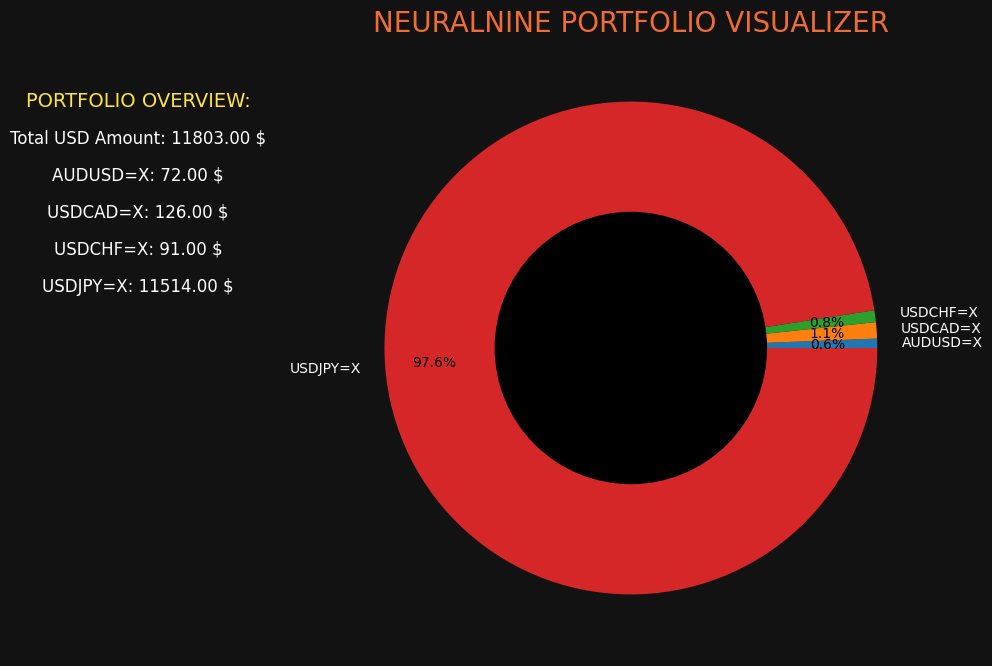

In [80]:
import time
tickers = list(trade['tic'].unique())
dates = df_actions.index
step = 0
for date in dates :
    sell_total = []
    sell_position_tickers = []
    buy_total = []
    buy_position_tickers = []
    step += 1
    for tic in tickers :
        amounts = df_actions.loc[date, tic]
        choosen_trade = trade[trade['date'] == date] 
        choosen_trade = choosen_trade[choosen_trade['tic'] == tic]
        prices = choosen_trade['close']
        flag, color = visualize_process(int(amounts * prices))
        if flag == 1:
            buy_total.append(int(amounts * prices))
            buy_position_tickers.append(tic)
        elif flag == -1:
            sell_total.append(int(amounts * prices))
            sell_position_tickers.append(tic)

    if len(buy_total) != 0 :
        buy_fig = visualize_portfolio(total=buy_total, tickers= buy_position_tickers)
        add_image_to_tensorboard(f"buy_portfolio:{step}", buy_fig)

    if len(sell_total) != 0 :
        sell_fig = visualize_portfolio(total=sell_total, tickers= sell_position_tickers)
        add_image_to_tensorboard(f"sell_portfolio:{step}", sell_fig)

In [125]:
writer = SummaryWriter(os.path.join(TENSORBOARD_LOG_DIR, 'ppo', 'Graph'))
writer.add_graph(trained_ppo, e_trade_gym)

ImportError: cannot import name 'metanet_pb2' from partially initialized module 'caffe2.proto' (most likely due to a circular import) (/home/mohammad/anaconda3/envs/FinRl/lib/python3.8/site-packages/caffe2/proto/__init__.py)

In [122]:
!tensorboard --logdir==runs

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.9.1 at http://localhost:6007/ (Press CTRL+C to quit)
^C


In [133]:
model.action_space

Box([-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.], (28,), float32)

In [135]:
len(processed_full['tic'].unique())

25